In [1]:
import torch

In [3]:
#%matplotlib inline
#import cv2
ss = '{"url": "http://www.sinaimg.cn/dy/slidenews/4_img/2013_24/704_997547_218968.jpg", "image_id": "d8eeddddcc042544a2570d4c452778b912726720", "keypoint_annotations": {"human3": [0, 0, 3, 0, 0, 3, 0, 0, 3, 67, 279, 1, 87, 365, 1, 65, 345, 1, 0, 0, 3, 0, 0, 3, 0, 0, 3, 40, 454, 1, 44, 554, 1, 0, 0, 3, 20, 179, 1, 17, 268, 1], "human2": [444, 259, 1, 474, 375, 2, 451, 459, 1, 577, 231, 1, 632, 396, 1, 589, 510, 1, 490, 538, 1, 0, 0, 3, 0, 0, 3, 581, 535, 2, 0, 0, 3, 0, 0, 3, 455, 78, 1, 486, 205, 1], "human1": [308, 306, 1, 290, 423, 1, 298, 528, 1, 433, 297, 1, 440, 404, 1, 447, 501, 2, 342, 530, 1, 0, 0, 3, 0, 0, 3, 417, 520, 1, 0, 0, 3, 0, 0, 3, 376, 179, 1, 378, 281, 1]}, "human_annotations": {"human3": [0, 169, 114, 633], "human2": [407, 59, 665, 632], "human1": [265, 154, 461, 632]}}';
import json
obj = json.loads(ss)

path = './img/' + obj['image_id'] + '.jpg'

#img = cv2.imread(path)

#import matplotlib.pyplot as plt
import matplotlib.image as plimg
img = plimg.imread(path)

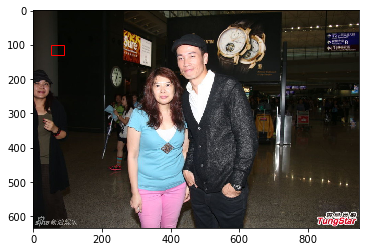

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
fig = plt.figure()
ax = fig.add_subplot(111)

rect = patches.Rectangle((50,100), 40, 30,linewidth=1,edgecolor='r',facecolor='none')

ax.imshow(img)
ax.add_patch(rect)
plt.show()


[0, 0, 3, 0, 0, 3, 0, 0, 3, 67, 279, 1, 87, 365, 1, 65, 345, 1, 0, 0, 3, 0, 0, 3, 0, 0, 3, 40, 454, 1, 44, 554, 1, 0, 0, 3, 20, 179, 1, 17, 268, 1]
[444, 259, 1, 474, 375, 2, 451, 459, 1, 577, 231, 1, 632, 396, 1, 589, 510, 1, 490, 538, 1, 0, 0, 3, 0, 0, 3, 581, 535, 2, 0, 0, 3, 0, 0, 3, 455, 78, 1, 486, 205, 1]
[308, 306, 1, 290, 423, 1, 298, 528, 1, 433, 297, 1, 440, 404, 1, 447, 501, 2, 342, 530, 1, 0, 0, 3, 0, 0, 3, 417, 520, 1, 0, 0, 3, 0, 0, 3, 376, 179, 1, 378, 281, 1]


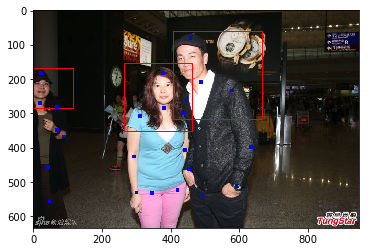

In [13]:
#%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(img)

for key in obj['human_annotations']:
    rc = obj['human_annotations'][key]
    x, y, w, h = rc[0], rc[1], rc[2] - rc[0], rc[3] - rc[1]
    rect = patches.Rectangle((x, y), w, w, linewidth = 1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    
# 人体骨骼关键点共有14个
# 1/右肩，2/右肘，3/右腕，4/左肩，5/左肘，6/左腕，7/右髋，8/右膝，9/右踝，10/左髋，11/左膝，12/左踝，13/头顶，14/脖子
# (x, y, v), v 表示是否可见，v=1可见，v=2 不可见，v=3 不在图内或不可推测
keypoints_map = obj['keypoint_annotations']
for key in keypoints_map:
    keypoints = keypoints_map[key]
    print(keypoints)
    x, y, v = 0, 0, 0
    i = 0
    for i in range(14):
        x, y, v = keypoints[i * 3], keypoints[i * 3 + 1], keypoints[i * 3 + 2]
        if v != 1:
            continue
        rect = patches.Rectangle((x, y), 5, 5, linewidth = 2, edgecolor='b', facecolor='none')
        ax.add_patch(rect)

plt.show()

根据标注的大小进行部位切割

In [14]:
print(img.shape)

(634, 950, 3)


(20, 179, 1) (17, 268, 1)
(455, 78, 1) (486, 205, 1)
(376, 179, 1) (378, 281, 1)


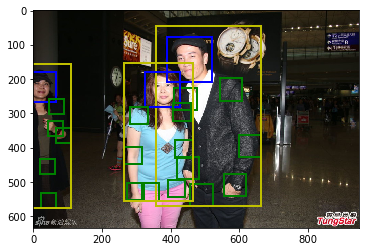

In [18]:
#%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(img)
    
# 人体骨骼关键点共有14个
# 1/右肩，2/右肘，3/右腕，4/左肩，5/左肘，6/左腕，7/右髋，8/右膝，9/右踝，10/左髋，11/左膝，12/左踝，13/头顶，14/脖子
# (x, y, v), v 表示是否可见，v=1可见，v=2 不可见，v=3 不在图内或不可推测
keypoints_map = obj['keypoint_annotations']

def get_pair(keypoints, i):
    return (keypoints[i * 3], keypoints[i * 3 + 1], keypoints[i * 3 + 2])

def distance(x1, y1, x2, y2):
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

def get_head_box(x_top, x_neck, y_top, y_neck):
    d = distance(x_top, y_top, x_neck, y_neck)
    d = int(d)
    return (int(x_top - d / 2), y_top, d, d)

def get_box(x, y, w):
    w = int(w)
    return (int(x - w / 2), int(y - w / 2), w, w)

def get_human_box(keypoints):
    (x_top, y_top, v_top) = get_pair(keypoints, 12)
    (x_neck, y_neck, v_neck) = get_pair(keypoints, 13)
    head_box = get_head_box(x_top, x_neck, y_top, y_neck)
    
    min_x, min_y = 10000, 10000
    max_x, max_y = 0, 0
    arr = []
    for i in range(14):
        (x, y, v) = get_pair(keypoints, i)
        if v == 1:
            arr.append((x, y))
    arr.append((head_box[0], head_box[1]))
    arr.append((head_box[0] + head_box[2], head_box[1] + head_box[3]))
    
    padding = head_box[2] / 4
    
    for (x, y) in arr:
        if x > max_x:
            max_x = x
        elif x < min_x:
            min_x = x
        if y > max_y:
            max_y = y
        elif y < min_y:
            min_y = y
    return (min_x - padding, min_y - padding, max_x - min_x + 2 * padding, max_y - min_y + 2 * padding)

for key in keypoints_map:
    keypoints = keypoints_map[key]
    # 头部大小
    
    # 先假定头一定有
    (x_top, y_top, v_top) = get_pair(keypoints, 12)
    (x_neck, y_neck, v_neck) = get_pair(keypoints, 13)
    print((x_top, y_top, v_top), (x_neck, y_neck, v_neck))
    head_box = get_head_box(x_top, x_neck, y_top, y_neck)
    head_size = head_box[2]
    rect = patches.Rectangle((head_box[0], head_box[1]), head_box[2], head_box[3], linewidth = 2, edgecolor='b', facecolor='none')
    ax.add_patch(rect)
    
    # 其他部位我们乘以一个系数
    # 1/右肩，2/右肘，3/右腕，4/左肩，5/左肘，6/左腕，7/右髋，8/右膝，9/右踝，10/左髋，11/左膝，12/左踝，
    beta = [ 0.5, 0.5, 0.5, 0.5, 0.5,     0.5, 0.5, 0.5, 0.5, 0.5,      0.5, 0.5 ]
    for i in range(12):
        (x, y, v) = get_pair(keypoints, i)
        if v != 1:
            continue
        size = head_size * beta[i]
        box = get_box(x, y, size)
        rect = patches.Rectangle((box[0], box[1]), box[2], box[3], linewidth = 2, edgecolor='g', facecolor='none')
        ax.add_patch(rect)
    
    human_box = get_human_box(keypoints)
    rect = patches.Rectangle((human_box[0], human_box[1]), human_box[2], human_box[3], linewidth = 2, edgecolor='y', facecolor='none')
    ax.add_patch(rect)
plt.show()

很棒，我们已经把标注数据都画出来了，基于标注数据我们生成了更多的标注框， 但进行有效的识别和分类依然是很难的，我们看到髋关节局部是没有什么特征的，所以单纯的部位识别可能不会奏效，从图中看，手部和面部应该是比较容易识别的点，其次是肩部、肘部，髋部最难

In [20]:
ss = '{"url": "http://www.sinaimg.cn/dy/slidenews/11_img/2015_23/611_175180_203563.jpg", "image_id": "14b28b5725f543c4cbdcd32202a661630bc5c17e", "keypoint_annotations": {"human9": [195, 183, 1, 231, 198, 1, 187, 194, 1, 226, 153, 1, 261, 160, 2, 248, 138, 1, 313, 190, 1, 363, 197, 1, 412, 199, 2, 325, 177, 1, 367, 187, 1, 410, 190, 2, 164, 154, 1, 200, 169, 1], "human8": [173, 296, 1, 235, 310, 1, 160, 330, 2, 179, 244, 1, 220, 232, 1, 183, 215, 1, 319, 244, 1, 352, 213, 1, 412, 202, 1, 311, 222, 1, 365, 221, 1, 411, 215, 1, 85, 275, 1, 148, 275, 1], "human7": [239, 433, 1, 323, 398, 1, 305, 452, 1, 183, 396, 1, 229, 342, 1, 163, 331, 1, 354, 303, 1, 373, 250, 1, 431, 240, 1, 333, 287, 1, 381, 256, 2, 424, 231, 1, 163, 476, 1, 201, 416, 1], "human6": [526, 499, 1, 532, 429, 1, 546, 378, 2, 414, 492, 1, 379, 427, 1, 325, 469, 1, 493, 329, 1, 457, 276, 1, 488, 259, 1, 445, 330, 1, 445, 282, 1, 466, 250, 1, 491, 598, 1, 472, 515, 1], "human5": [761, 251, 1, 706, 238, 2, 653, 225, 2, 762, 288, 1, 711, 300, 1, 662, 311, 1, 631, 221, 1, 573, 213, 1, 523, 203, 1, 629, 251, 1, 575, 236, 1, 519, 212, 2, 830, 274, 1, 774, 276, 1], "human4": [675, 162, 2, 637, 166, 2, 641, 147, 1, 702, 186, 1, 677, 200, 1, 651, 214, 1, 613, 171, 1, 577, 180, 1, 531, 188, 1, 618, 188, 1, 580, 197, 1, 535, 198, 1, 728, 163, 1, 700, 173, 1], "human3": [588, 110, 2, 563, 121, 2, 567, 104, 1, 621, 126, 1, 611, 144, 1, 640, 138, 1, 560, 134, 2, 547, 134, 1, 515, 166, 1, 573, 142, 1, 552, 159, 1, 524, 174, 1, 627, 102, 1, 608, 113, 1], "human2": [484, 99, 1, 463, 115, 1, 444, 102, 1, 514, 102, 1, 532, 122, 1, 553, 105, 1, 482, 127, 1, 483, 138, 1, 485, 156, 2, 505, 134, 1, 503, 150, 1, 489, 168, 2, 499, 82, 1, 499, 93, 1], "human1": [376, 106, 1, 375, 125, 1, 366, 102, 1, 408, 97, 2, 434, 116, 1, 434, 101, 1, 402, 134, 1, 417, 135, 1, 442, 174, 2, 423, 130, 1, 434, 144, 1, 451, 168, 2, 380, 82, 1, 391, 95, 1], "human10": [297, 127, 1, 296, 148, 1, 265, 135, 1, 330, 112, 1, 362, 129, 2, 358, 108, 1, 350, 149, 1, 380, 168, 1, 419, 182, 2, 366, 141, 1, 393, 156, 1, 424, 177, 2, 293, 104, 1, 310, 115, 1], "human11": [769, 420, 1, 721, 368, 1, 672, 335, 1, 695, 462, 1, 612, 429, 1, 561, 381, 1, 647, 329, 1, 576, 284, 2, 526, 247, 2, 611, 348, 1, 580, 259, 1, 527, 251, 1, 781, 529, 2, 739, 447, 1]}, "human_annotations": {"human9": [153, 122, 444, 214], "human8": [74, 168, 445, 347], "human7": [112, 192, 457, 513], "human6": [285, 209, 564, 620], "human5": [490, 174, 842, 327], "human4": [495, 132, 734, 218], "human3": [486, 89, 655, 186], "human2": [433, 78, 566, 191], "human1": [352, 77, 468, 189], "human10": [242, 95, 453, 205], "human11": [498, 203, 817, 542]}}'
obj = json.loads(ss)

In [25]:
def anno(obj):
    path = './img/' + obj['image_id'] + '.jpg'
    img = plimg.imread(path)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(img)
    
    # 人体骨骼关键点共有14个
    # 1/右肩，2/右肘，3/右腕，4/左肩，5/左肘，6/左腕，7/右髋，8/右膝，9/右踝，10/左髋，11/左膝，12/左踝，13/头顶，14/脖子
    # (x, y, v), v 表示是否可见，v=1可见，v=2 不可见，v=3 不在图内或不可推测
    keypoints_map = obj['keypoint_annotations']
    for key in keypoints_map:
        keypoints = keypoints_map[key]
        # 头部大小

        # 先假定头一定有
        (x_top, y_top, v_top) = get_pair(keypoints, 12)
        (x_neck, y_neck, v_neck) = get_pair(keypoints, 13)

        head_box = get_head_box(x_top, x_neck, y_top, y_neck)
        head_size = head_box[2]
        rect = patches.Rectangle((head_box[0], head_box[1]), head_box[2], head_box[3], linewidth = 2, edgecolor='b', facecolor='none')
        ax.add_patch(rect)

        # 其他部位我们乘以一个系数
        # 1/右肩，2/右肘，3/右腕，4/左肩，5/左肘，6/左腕，7/右髋，8/右膝，9/右踝，10/左髋，11/左膝，12/左踝，
        beta = [ 0.5, 0.5, 0.5, 0.5, 0.5,     0.5, 0.5, 0.5, 0.5, 0.5,      0.5, 0.5 ]
        for i in range(12):
            (x, y, v) = get_pair(keypoints, i)
            if v != 1:
                continue
            size = head_size * beta[i]
            box = get_box(x, y, size)
            rect = patches.Rectangle((box[0], box[1]), box[2], box[3], linewidth = 2, edgecolor='g', facecolor='none')
            ax.add_patch(rect)

        human_box = get_human_box(keypoints)
        rect = patches.Rectangle((human_box[0], human_box[1]), human_box[2], human_box[3], linewidth = 2, edgecolor='y', facecolor='none')
        ax.add_patch(rect)
    plt.show()


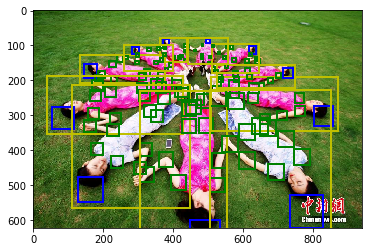

In [26]:
anno(obj)

这难度也是没谁了